In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "C:/Users/user/data/Desktop/investments_vc/investments_VC.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Clean column names (remove leading/trailing spaces)
df.columns = df.columns.str.strip()

# Clean the 'funding_total_usd' column
df['funding_total_usd_clean'] = pd.to_numeric(
    df['funding_total_usd'].str.replace(',', '', regex=False).str.replace('$', '', regex=False),
    errors='coerce'
)

# Define common funding types
funding_types = [
    'seed', 'venture', 'equity_crowdfunding', 'undisclosed',
    'convertible_note', 'debt_financing', 'angel', 'grant',
    'private_equity', 'post_ipo_equity', 'post_ipo_debt',
    'secondary_market', 'product_crowdfunding'
]

In [8]:
# 1. Top countries by total funding
top_countries = (
    df.groupby('country_code')['funding_total_usd_clean']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

In [9]:
# 2. Most popular funding types
funding_type_counts = df[funding_types].astype(bool).sum().sort_values(ascending=False)

In [10]:
# 3. Average funding by market
avg_funding_by_market = (
    df.groupby('market')['funding_total_usd_clean']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

In [11]:
# 4. Funding trends over time
df['founded_year'] = pd.to_numeric(df['founded_year'], errors='coerce')
funding_trend = (
    df.groupby('founded_year')['funding_total_usd_clean']
    .sum()
    .dropna()
)

In [12]:
# 5. Top funded companies
top_companies = (
    df[['name', 'funding_total_usd_clean']]
    .dropna()
    .sort_values(by='funding_total_usd_clean', ascending=False)
    .head(10)
)

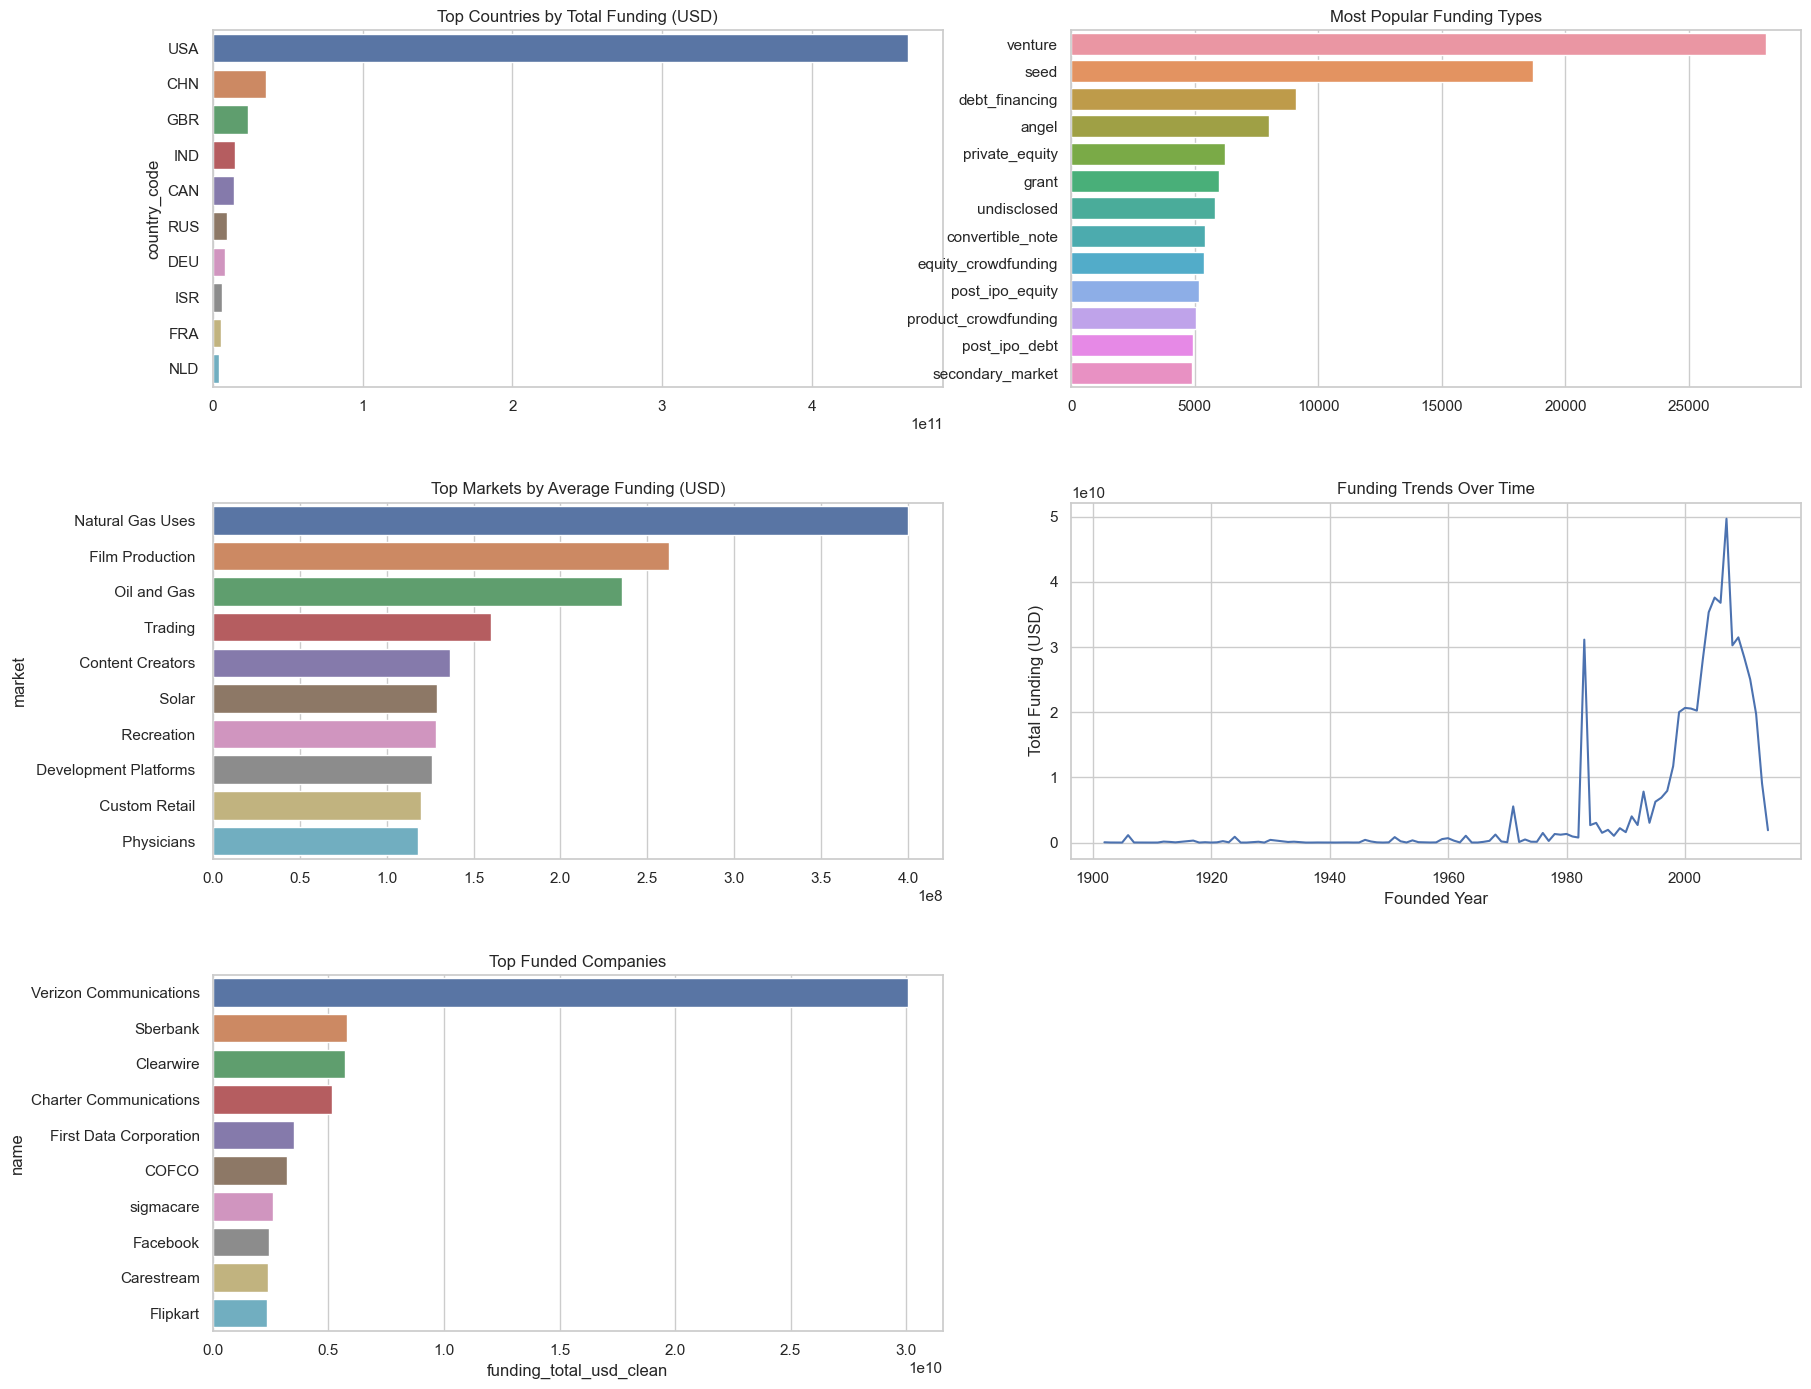

In [15]:
# --- Visualization ---
sns.set(style="whitegrid")
fig, axs = plt.subplots(3, 2, figsize=(18, 15))
plt.tight_layout(pad=5.0)

# Top countries by total funding
sns.barplot(x=top_countries.values, y=top_countries.index, ax=axs[0, 0])
axs[0, 0].set_title("Top Countries by Total Funding (USD)")

# Most popular funding types
sns.barplot(x=funding_type_counts.values, y=funding_type_counts.index, ax=axs[0, 1])
axs[0, 1].set_title("Most Popular Funding Types")

# Average funding by market
sns.barplot(x=avg_funding_by_market.values, y=avg_funding_by_market.index, ax=axs[1, 0])
axs[1, 0].set_title("Top Markets by Average Funding (USD)")

# Funding trends over time
sns.lineplot(x=funding_trend.index, y=funding_trend.values, ax=axs[1, 1])
axs[1, 1].set_title("Funding Trends Over Time")
axs[1, 1].set_xlabel("Founded Year")
axs[1, 1].set_ylabel("Total Funding (USD)")

# Top funded companies
sns.barplot(x=top_companies['funding_total_usd_clean'], y=top_companies['name'], ax=axs[2, 0])
axs[2, 0].set_title("Top Funded Companies")

# Hide the unused subplot
axs[2, 1].axis('off')

plt.show()

In [16]:
df.to_csv("cleaned_investments.csv", index=False)
print("Cleaned CSV saved.")

Cleaned CSV saved.
